# PCA with S-curve dataset

In [1]:
%matplotlib inline

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.datasets import make_s_curve

import torch

from model.pca import PCA

plt.style.use("seaborn-darkgrid")

# Data

## Sample

In [7]:
n_dim = 500

x, t = make_s_curve(n_dim, random_state=0)
x = torch.tensor(x, dtype=torch.float32)

## Plot

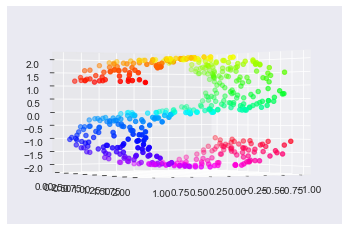

In [8]:
fig = plt.figure()
ax = fig.add_subplot(111, projection="3d")

ax.scatter(x.numpy()[:, 0], x.numpy()[:, 1], zs=x.numpy()[:, 2],
           c=t, cmap=plt.get_cmap("hsv"))
ax.view_init(elev=0, azim=60)
plt.show()

# Model

In [9]:
x_dim = 3
z_dim = 2

pca = PCA(x_dim, z_dim, n_dim)

In [10]:
pca.inference({"x": x})

In [11]:
sample = pca.sample({"x": x})

# Plot

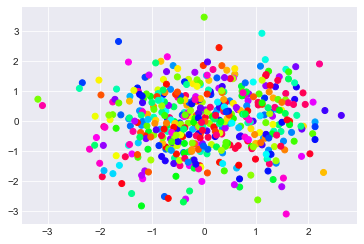

In [14]:
data = sample["z"]

plt.figure()
plt.scatter(data.numpy()[:, 0], data.numpy()[:, 1],
            c=t, cmap=plt.get_cmap("hsv"))
plt.show()

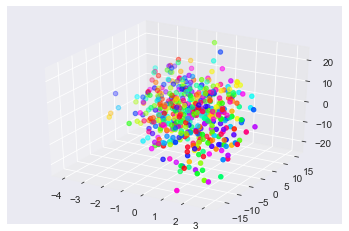

In [15]:
data = sample["x"]

fig = plt.figure()
ax = fig.add_subplot(111, projection="3d")
ax.scatter(data.numpy()[:, 0], data.numpy()[:, 1], zs=data.numpy()[:, 2],
           c=t, cmap=plt.get_cmap("hsv"))
plt.show()